In [1]:
data.info()

NameError: name 'data' is not defined

In [2]:
data.describe()

NameError: name 'data' is not defined

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

In [4]:
import os
from google.cloud import bigquery
from google.oauth2 import service_account
from google.cloud.bigquery import magics

CONFIGURE THE BIGQUERY SETTINGS

In [5]:
BIGQUERY_PROJECT = 'ironhacks-data'
bigquery_client = bigquery.Client(project=BIGQUERY_PROJECT)

In [6]:
query = """
SELECT *
FROM `ironhacks-data.ironhacks_competition.unemployment_data`
"""

In [7]:
# QUERY THE DATA ONCE
query_job = bigquery_client.query(query)
data = query_job.to_dataframe()
# data['date']= pd.to_datetime(data['date'])
data.head()

,uu_id,timeperiod,week_number,countyfips,tract,tract_name,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,...,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_hawaiiannative,race_other,race_white
0,f013068de98db1470bd986137a0c6d23,20220416,16,18003,900,"Census Tract 9, Allen County, Indiana",22,0,<NA>,14,...,<NA>,<NA>,0,0,0,11,0,0,<NA>,<NA>
1,21957d5517323845818d87623589e1ba,20220319,12,18089,10400,"Census Tract 104, Lake County, Indiana",111,0,<NA>,108,...,76,35,0,0,0,<NA>,<NA>,0,0,0
2,6a5609f385912113b6f1014b958ed748,20220326,13,18089,11500,"Census Tract 115, Lake County, Indiana",39,0,<NA>,<NA>,...,<NA>,<NA>,0,0,0,39,0,0,0,0
3,46b2882ec4c373527ec33f7bd4f1388d,20220716,29,18089,20700,"Census Tract 207, Lake County, Indiana",14,0,<NA>,<NA>,...,<NA>,<NA>,0,0,<NA>,10,0,0,<NA>,<NA>
4,37495d17e82f7df326bfc2c4c090f7b7,20220409,15,18089,21900,"Census Tract 219, Lake County, Indiana",155,0,<NA>,69,...,90,65,0,0,0,135,<NA>,<NA>,<NA>,<NA>


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16833 entries, 0 to 16832
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   uu_id                   16833 non-null  object
 1   timeperiod              16833 non-null  Int64 
 2   week_number             16833 non-null  Int64 
 3   countyfips              16833 non-null  Int64 
 4   tract                   16833 non-null  Int64 
 5   tract_name              16833 non-null  object
 6   total_claims            16833 non-null  Int64 
 7   edu_8th_or_less         13748 non-null  Int64 
 8   edu_grades_9_11         5942 non-null   Int64 
 9   edu_hs_grad_equiv       6036 non-null   Int64 
 10  edu_post_hs             3246 non-null   Int64 
 11  edu_unknown             12031 non-null  Int64 
 12  top_category_employer1  16833 non-null  object
 13  top_category_employer2  16833 non-null  object
 14  top_category_employer3  16833 non-null  object
 15  ge

In [9]:
data.describe()

,timeperiod,week_number,countyfips,tract,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,edu_unknown,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_hawaiiannative,race_other,race_white
count,16833.0,16833.0,16833.0,16833.0,16833.0,13748.0,5942.0,6036.0,3246.0,12031.0,3835.0,3931.0,15868.0,15285.0,14939.0,7124.0,10089.0,16426.0,8075.0,6392.0
mean,20220540.093329,21.329531,18088.919682,211605.900315,22.952712,0.050989,1.291148,19.319583,16.923598,0.131992,18.957757,19.689138,0.005546,0.010926,0.014057,10.738069,0.207156,0.0,0.504396,17.312735
std,268.366832,11.618554,41.019467,288715.02492,14.583655,1.05481,5.320218,12.554864,10.889373,1.772384,11.939064,12.093698,0.454213,0.49316,0.568924,15.92762,2.51169,0.0,3.353956,11.623372
min,20220101.0,1.0,18001.0,100.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,20220312.0,11.0,18063.0,10100.0,14.0,0.0,0.0,12.0,11.0,0.0,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
50%,20220528.0,22.0,18095.0,42801.0,18.0,0.0,0.0,15.0,14.0,0.0,15.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0
75%,20220806.0,32.0,18103.0,342600.0,27.0,0.0,0.0,22.0,20.0,0.0,22.0,23.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,21.0
max,20220910.0,37.0,18183.0,976400.0,170.0,41.0,78.0,137.0,154.0,60.0,126.0,139.0,49.0,36.0,41.0,163.0,110.0,0.0,74.0,155.0


In [10]:
final_training_data = pd.get_dummies(data, columns=['uu_id', 'tract_name', 'top_category_employer1', 'top_category_employer2', 'top_category_employer3'])
final_training_data.head()

,timeperiod,week_number,countyfips,tract,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,edu_unknown,...,top_category_employer3_55,top_category_employer3_56,top_category_employer3_61,top_category_employer3_62,top_category_employer3_71,top_category_employer3_72,top_category_employer3_81,top_category_employer3_92,top_category_employer3_99,top_category_employer3_N/A
0,20220416,16,18003,900,22,0,<NA>,14,<NA>,0,...,0,0,0,1,0,0,0,0,0,0
1,20220319,12,18089,10400,111,0,<NA>,108,<NA>,0,...,0,1,0,0,0,0,0,0,0,0
2,20220326,13,18089,11500,39,0,<NA>,<NA>,<NA>,0,...,0,0,0,0,0,0,0,0,0,1
3,20220716,29,18089,20700,14,0,<NA>,<NA>,<NA>,<NA>,...,0,0,0,0,0,0,0,0,0,0
4,20220409,15,18089,21900,155,0,<NA>,69,83,<NA>,...,0,1,0,0,0,0,0,0,0,0


In [11]:
data_3 = final_training_data.dropna(axis=0)

In [12]:
X = data_3.drop("total_claims",1)   #Feature Matrix

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_15342/3109327839.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data_3.drop("total_claims",1)   #Feature Matrix


In [13]:
y = data_3["total_claims"]          #Target Variable

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [15]:
y_pred = model.predict(X)

In [16]:
y_pred

array([16., 28., 37., 45., 37., 73., 73., 31., 53., 37., 98., 75., 38.,
       60., 60., 55.])

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

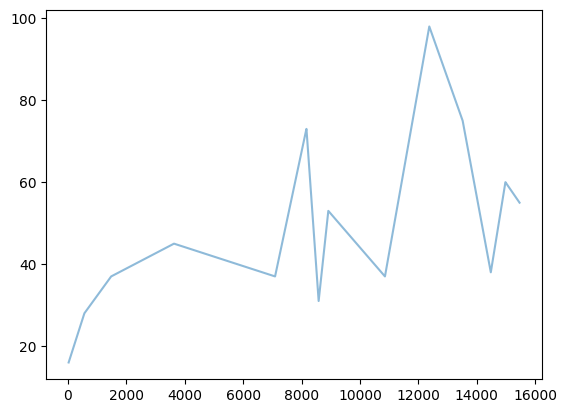

In [17]:
ax = y.plot(alpha=0.5)
ax = y_pred.plot(ax=ax, linewidth=3)